<div class="alert alert-block alert-info">

<b>Thank you for contributing to TeachOpenCADD!</b>

</div>

<div class="alert alert-block alert-info">

<b>Set up your PR</b>: Please check out our <a href="https://github.com/volkamerlab/teachopencadd/issues/41">issue</a> on how to set up a PR for new talktorials, including standard checks and TODOs.

</div>

# T05 . Transformer based Molecular Property prediction

Authors:

- Kalanika Elamaldeniya, 22/05/2023,Volkamer Lab, Saarland University


*The examples used in this talktorial template are taken from [__Talktorial T001__](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T001_query_chembl/talktorial.ipynb) and [__Talktorial T002__](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T002_compound_adme/talktorial.ipynb).*

<div class="alert alert-block alert-info">

<b>Cross-referencing talktorials</b>: If you want to cross-reference to existing talktorials in your notebook, please use the following formatting: <b>Talktorial T000</b>.

</div>

## Aim of this talktorial

In this tutorial, Aim is to provide a guide on using the Molecular Transformer model for solubility prediction. We will explain the Transformers. By utilizing the ESOL dataset, which contains molecular properties of small molecules, we will demonstrate how to train and evaluate the Molecular Transformer model using PyTorch

### Contents in *Theory*

_Add Table of Contents (TOC) for Theory section._

* Transformer Model
* What Can Transformer Model do
* Transformers Replace RNN and CNN
* Transformer Architecture
  * self attention mechanism
  * Multi -head Attention
  * Feed Forward Netwrok
* Property Prediction
* Input Representation
* Output and Training
* Transformer advantages over traditional models in capturing contextual information
* Applications of Transformer-Based Property Prediction:


  





<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Theory</i> section.

</div>

### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._

* Preprocessing and Data Preparation
* Model Architecture and traning
* Model Evaluation


<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Practical</i> section.

</div>

### References

* Paper
* Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A.N., Kaiser, L., & Polosukhin, I. (2017). "Attention is All You Need." Advances in Neural Information Processing Systems (NeurIPS), 30, 5998-6008. Retrieved from https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf

* Chandra A, Tünnermann L, Löfstedt T, Gratz R. "Transformer-based deep learning for predicting protein properties in the life sciences." Elife. 2023 Jan 18;12:e82819. doi: 10.7554/eLife.82819. PMID: 36651724; PMCID: PMC9848389.

* Tutorial links

 https://www.youtube.com/watch?v=4Bdc55j80l8&t=325s
 
 https://www.youtube.com/watch?v=kqMD501VzdI&t=454s
 
 
 
* Blog 

  https://machinelearningmastery.com/the-transformer-model/
  
  https://blogs.nvidia.com/blog/2022/03/25/what-is-a-transformer-model/
  
  https://towardsdatascience.com/attention-is-all-you-need-e498378552f9
  
 

## Theory

## Transformer model

Transformers are a type of deep learning model that has gained significant attention for its ability to capture complex patterns and relationships in sequential data. which was described in the 2017 "Attention is all you need "paper. It uses a set of mathematical techniques called self-attention which will describe more later. 
.


##  What Can Transformer Model do

Transformers were originally introduced for natural language processing tasks. However, its effectiveness extends beyond language tasks and has been successfully applied to various domains, including property prediction tasks in chemistry and drug discovery.
They’re helping researchers understand the chains of genes in DNA and amino acids in proteins in ways that can speed drug design.

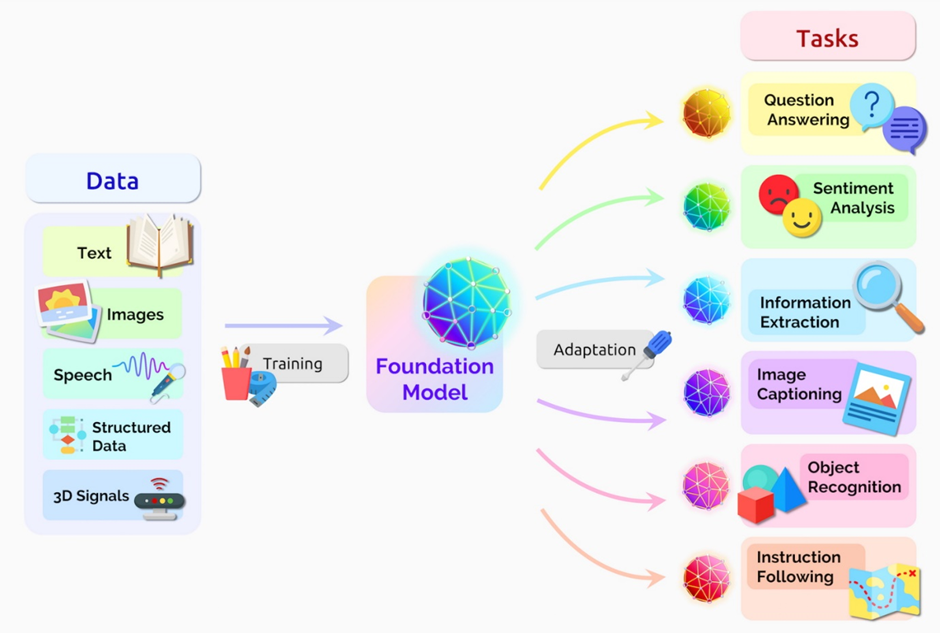
*Figure 1:* 
Transformer Model.
Figure and description taken from: [<i>Nvidia.</i> (2022),](https://blogs.nvidia.com/blog/2022/03/25/what-is-a-transformer-model/).

Also, we are using Transformers every time when we are using Google. It can detect trends and anomalies to prevent fraud, streamline manufacturing, make online recommendations, or improve healthcare.
 In this theory, we will explore the key concepts and techniques involved in using Transformer models for property prediction.


### Transformers Replace CNN and RNN

Transformers are neural networks more popular in this era, compared to RNN and CNN 5 years ago. Transformers are the most powerful tool in property prediction and NLP in various domains such as chemistry, Bioinformatics, and Drug discovery because of their ability to capture long-range dependencies in a sequence efficiently, making them better at understanding the broader context. In Contrast to the Transformer model, RNN processes sequences sequentially and may struggle with capturing long-range dependencies. Also, the Transformer model shows promising results in Computer vision tasks. Vision Transformers (ViTs) divide images into patches and process them using the Transformer architecture. Although they don't use traditional convolutional operations like convolutional neural networks (CNNs), ViTs have achieved competitive performance in image classification.


### Transformer Architecture:

The Transformer are basically large encoder/decoder blocks that process data and it consists of self-attention and feed-forward neural network layers. Unlike traditional recurrent neural networks (RNNs) or convolutional neural networks (CNNs), Transformers do not rely on sequential processing or explicit convolutional operations. Instead, they have implemnted self-attention mechanisms to capture relationships between different elements in the input.

Transformers use positional encoders to tag data elements coming in and out of the network. Attention units follow these tags, calculating a kind of algebraic map of how each element relates to the others


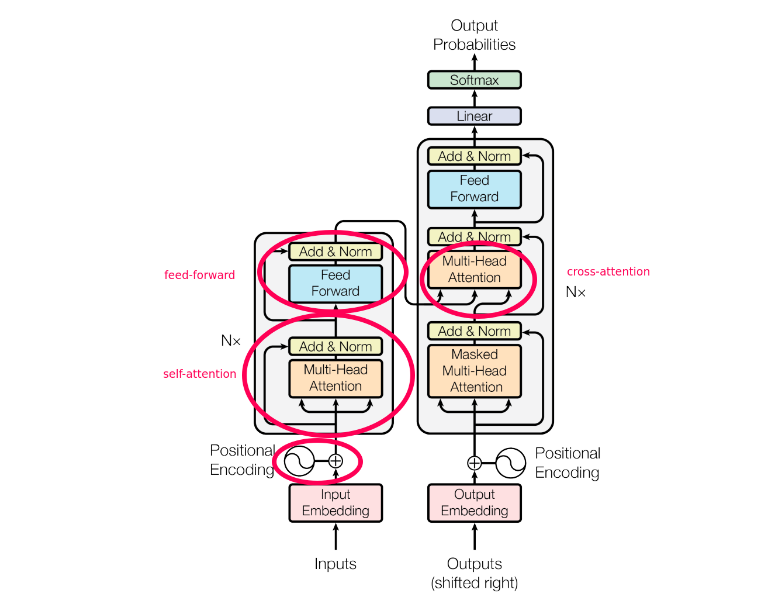
*Figure 2:* 
Transformer Model.
Figure and description taken from: [<i>MachineLearningmastery</i>](https://machinelearningmastery.com/the-transformer-model/).


### Self-Attention Mechanism:

Self-attention is a crucial component in Transformer model architecture. At NLP system It enables the Transformer to weigh the importance of different words (or tokens) in a sequence when encoding information. It allows the model to capture relationships between words, regardless of their positions in the sequence. The self-attention mechanism can be broken down into three main steps: computing attention scores, applying softmax, and obtaining weighted representations.

In the context of property prediction, self-attention enables the model to learn how different atoms in a molecule interact and contribute to its properties. The self-attention mechanism computes attention weights for each element based on its similarity to other elements and uses these weights to aggregate information from relevant elements.
Self-attention finds meaning, for example,

She added water from the pitcher into the cup until it was full. 

We know “it” refers to the cup, while in the sentence:

She poured water from the pitcher to the cup until it was empty.

We know “it” refers to the pitcher. 
 [1]

Ashish Vaswani, a former senior staff research scientist at Google Brain who led work on the seminal 2017(“Attention is all you need “) paper said, “Machine translation was a good vehicle to validate self-attention because you needed short- and long-distance relationships among words,” Now we see self-attention is a powerful, flexible tool for learning,” he added.


###### Applying Softmax:

After computing the attention scores, we apply the softmax function to obtain attention weights that sum up to 1. The softmax function ensures that each word's attention weight represents its relative importance within the context of the sentence.

###### Weighted Representations:

Finally, we multiply the attention weights with the value vectors for each word to obtain the weighted representations. The weighted representations are then summed up to create the final representation for each word.

### Multi-Head Attention:
To enhance the representation power and capture diverse relationships, the self-attention mechanism is usually employed in multiple parallel heads. Each attention head attends to different subsets of the input sequence and produces separate sets of attention weights and aggregated representations. The outputs of the attention heads are then concatenated and linearly transformed to generate the final output of the self-attention layer.


### Feed-Forward Networks:
After the self-attention layer, Transformer models typically employ feed-forward neural networks (FFNs) to process the aggregated representations. FFNs consist of fully connected layers with non-linear activation functions, enabling the model to capture complex relationships and patterns in the learned representations. The FFN layers provide additional transformations and non-linearities to refine the learned features before the final prediction.

### Property Prediction
Property prediction should be more accurate and efficient when it comes to most of the Drug design, and discovery things.
 In this talktorial, we are considering the solubility prediction of small molecules.
Solubility prediction is a critical aspect of various scientific disciplines, including pharmaceutical drug discovery, etc. Predicting the solubility of small molecules is essential for designing effective drug formulations, predicting their environmental fate, and optimizing chemical processes. The solubility prediction task involves mapping a molecular structure to its corresponding solubility value, which is a regression problem.
So here we are using a transformer-based method to predict the solubility of small molecules. However, there are some traditional empirical methods for solubility prediction, such as rule-based approaches and quantitative structure-activity relationship (QSAR) models. But they often have limitations,
Rule-based approaches rely on predefined rules or heuristics to predict solubility. These rules are often based on expert knowledge or chemical intuition. However, these approaches may oversimplify the relationship between molecular structures and solubility, leading to limited accuracy.
 
Quantitative Structure-Activity Relationship (QSAR) Models:
QSAR models using statistical and machine learning techniques to establish quantitative relationships between molecular descriptors and solubility. But these models also have limitations due to their reliance on preselected descriptors and assumptions about linearity.
For example, one limitation is Descriptor Selection Bias: choice descriptors are subjective and may not identify all the important features that need for solubility prediction.
In contrast, Transformer-based models offer advantages in capturing the complex relationships between molecular structures and solubility.  
By use of the Self-attention mechanism and the ability to learn from large amounts of data, these models can discover intricate patterns, nonlinearity, and long-range dependencies in molecular structures, resulting in improved solubility predictions across diverse chemical space.



### Input Representation:

As an example ,

Here the english text is the raw data, but As any other models ,transformer model does not underastand the text in english.So as in the *Figure 2* every word in text convert to unique numeric ID.This is accomplished by using a specific dictionary of vocabulary, which can be generated from the training data and is utilized to map each word to a numeric index.

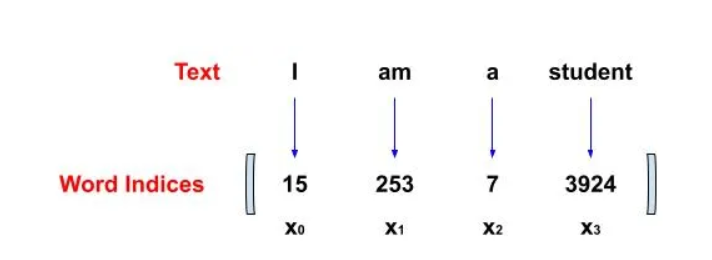

*Figure 2:* 
Numerical Representation of the Raw Text. Figure and description taken from: [<i>Towards data science.</i> (2022)](https://towardsdatascience.com/attention-is-all-you-need-e498378552f9/).



In the Property prediction context, there are There are several ways to represent molecules which are explained and discussed in **Talktorial T033**, the input representation involves encoding the molecular structure and features. One common approach is to represent molecules as graphs, where atoms are nodes and bonds are edges. Each atom and bond can have associated features, such as atomic number, chirality, and bond type. Using learnable embedding layers these features are embedded into a continuous vector representation.

### Output and Training:

The output of a Transformer model for property prediction can be a graph-level prediction or node-level prediction, depending on the task. For graph-level tasks, such as predicting molecular properties, a global pooling operation can be applied to obtain a fixed-size representation of the molecule from the node-level representations. This global representation is then fed into a fully connected layer to make the final prediction. Node-level predictions can be made by applying a separate classifier to each node representation.

Training a Transformer model for property prediction involves optimizing the model's parameters using a suitable loss function. Common loss functions for regression tasks include mean squared error (MSE) or mean absolute error (MAE), while classification tasks often use cross-entropy loss. The model is trained using backpropagation and gradient-based optimization algorithms, such as stochastic gradient descent (SGD) or Adam, to minimize the loss function.


### Transformer advantages over traditional models in capturing contextual information

Compared to traditional recurrent or convolutional neural networks, transformers can capture long-range dependencies efficiently. And it mainly relies on self-attention mechanisms to process input data. The attention mechanism allows transformers to assign varying weights to different parts of the input sequence, enabling them to focus on the most relevant information.

So, in the solubility prediction task, transformers excel at capturing the intricate relationships between molecular features and solubility. By considering the entire molecular structure simultaneously, transformers can effectively capture the complex interactions between atoms, functional groups, and other molecular descriptors that contribute to solubility. This holistic view of the molecule allows transformers to capture crucial contexts and dependencies that traditional models might overlook.


### Applications of Transformer-Based Property Prediction:
Transformer models have demonstrated promising results in various property prediction tasks related to molecules and chemicals. Some applications include:

1. Molecular Property Prediction: Transformers can be used to predict various molecular properties, such as toxicity, solubility, bioactivity,

 or drug-likeness. By learning from large-scale chemical databases, Transformer models can capture complex structure-property relationships and assist in drug discovery and material design.

2. Generative Models for Molecule Design: Transformers can be employed in generative models for de novo molecule design. By leveraging the learned representations and attention mechanisms, these models can generate novel molecules with desired properties or optimize existing molecules.

3. Protein Structure and Function Prediction: Transformers have also been applied to predict protein properties and functions. By representing protein sequences or structures as input sequences, Transformers can learn meaningful representations that aid in tasks such as protein structure prediction, protein-ligand binding affinity prediction, or protein function annotation.

4. Drug-Target Interaction Prediction: Transformer models can be utilized to predict the interactions between drugs and their target proteins. By encoding drug and protein features and capturing their relationships, these models enable the identification of potential drug-target interactions, supporting drug repurposing and personalized medicine.


In summary, Transformer models have emerged as powerful tools for property prediction tasks in various domains, including chemistry, drug discovery, and bioinformatics. By leveraging self-attention mechanisms and neural network layers, these models can capture complex relationships in structured data and provide accurate predictions for graph-based tasks.

## Practical

This code utilizes a transformer-based model implemented in PyTorch to predict solubility based on molecular fingerprints. It preprocesses the data, trains the model using a custom dataset and DataLoader, and includes evaluation graphs of the training and test losses to assess the model's performance.

In [14]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt


In [ ]:
!pip install torch

In [16]:
!pip install rdkit


In [22]:
# Load the dataset
data = pd.read_csv('esol.csv')  

# Preprocess the data
def preprocess_data(data):
    # Drop missing values
    data = data.dropna()

In [27]:
# Convert SMILES strings to molecules
data['mol'] = data['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

# Compute molecular fingerprints
    data['fingerprints'] = data['mol'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2))

# Convert fingerprints to numpy arrays
    fingerprints = np.array(data['fingerprints'].to_list())

# Scale the input features
    scaler = StandardScaler()
    fingerprints = scaler.fit_transform(fingerprints)

# Convert the target values to torch tensors
    solubility = torch.tensor(data['measured log solubility in mols per litre'].values, dtype=torch.float32).unsqueeze(1)

    return fingerprints, solubility

IndentationError: unexpected indent (3895496555.py, line 5)

In [ ]:
# Split data into train and test sets
train_data, test_data = train_test_split(esol_data, test_size=0.2, random_state=42)

# Preprocess train and test data
train_fingerprints, train_solubility = preprocess_data(train_data)
test_fingerprints, test_solubility = preprocess_data(test_data)

In [ ]:
# Define a custom dataset
class SolubilityDataset(Dataset):
    def __init__(self, fingerprints, solubility):
        self.fingerprints = fingerprints
        self.solubility = solubility

    def __len__(self):
        return len(self.fingerprints)

    def __getitem__(self, idx):
        return self.fingerprints[idx], self.solubility[idx]


# Create dataloaders
train_dataset = SolubilityDataset(train_fingerprints, train_solubility)
test_dataset = SolubilityDataset(test_fingerprints, test_solubility)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)



In [ ]:
# Define the transformer-based model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout):
        super(TransformerModel, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_heads = num_heads
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.embedding = nn.Linear(input_dim, hidden_dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(hidden_dim, num_heads, dim_feedforward=hidden_dim, dropout=dropout),
            num_layers
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(1, 0, 2)  # Change the input shape for transformer
        x = self.transformer(x)
        x = x.permute(1, 0, 2)  # Reshape back to (batch_size, sequence_length, hidden_dim)
        x = torch.mean(x, dim=1)  # Average pooling over the sequence
        x = self.fc(x)
        return x


In [ ]:
# Set the device (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the model hyperparameters
input_dim = train_fingerprints.shape[1]
output_dim = 1
num_heads = 4
hidden_dim = 128
num_layers = 4
dropout = 0.2

In [ ]:
# Create an instance of the model
model = TransformerModel(input_dim, output_dim, num_heads, hidden_dim, num_layers, dropout).to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = 0.0

    # Training
    model.train()
    for fingerprints, solubility in train_loader:
        fingerprints = fingerprints.to(device)
        solubility = solubility.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(fingerprints)

        # Compute loss
        loss = criterion(outputs, solubility)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * fingerprints.size(0)

    train_loss /= len(train_loader.dataset)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss:.4f}')

# Evaluation
model.eval()
test_loss = 0.0
with torch.no_grad():
    for fingerprints, solubility in test_loader:
        fingerprints = fingerprints.to(device)
        solubility = solubility.to(device)

        outputs = model(fingerprints)
        loss = criterion(outputs, solubility)

        test_loss += loss.item() * fingerprints.size(0)

    test_loss /= len(test_loader.dataset)

print(f'Test Loss: {test_loss:.4f}')


## Discussion

Wrap up the talktorial's content here and discuss pros/cons and open questions/challenges.

## Quiz

Ask three questions that the user should be able to answer after doing this talktorial. Choose important take-aways from this talktorial for your questions.

1. Question
2. Question
3. Question

<div class="alert alert-block alert-info">

<b>Useful checks at the end</b>: 
    
<ul>
<li>Clear output and rerun your complete notebook. Does it finish without errors?</li>
<li>Check if your talktorial's runtime is as excepted. If not, try to find out which step(s) take unexpectedly long.</li>
<li>Flag code cells with <code># TODO: CI</code> that have deterministic output and should be tested within our Continuous Integration (CI) framework.</li>
</ul>

</div>